In [5]:
import numpy as np # For linear algebra.
import pandas as pd #For data processing.
import seaborn as sns # For creating plots.
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick # For specifying the axes tick format 

sns.set(style = 'dark')


In [4]:
#read csv
df = pd.read_csv('C:/Users/winnie.gacheru/Telco churn/ADS-Assignment-4/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
#show colunms and rows
print(df.shape)

(7043, 21)


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
for columns in df.columns:
    print(columns,"=",df[columns].nunique())

customerID = 7043
gender = 2
SeniorCitizen = 2
Partner = 2
Dependents = 2
tenure = 73
PhoneService = 2
MultipleLines = 3
InternetService = 3
OnlineSecurity = 3
OnlineBackup = 3
DeviceProtection = 3
TechSupport = 3
StreamingTV = 3
StreamingMovies = 3
Contract = 3
PaperlessBilling = 2
PaymentMethod = 4
MonthlyCharges = 1585
TotalCharges = 6531
Churn = 2


In [12]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [18]:
#Check for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

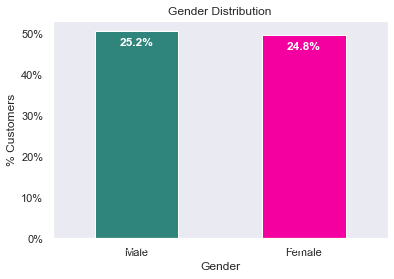

In [32]:
#Check Demograpics
#start with gender
df.gender.value_counts(normalize=True).plot(kind='bar');colors = ['#2f847c','#F400a1']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


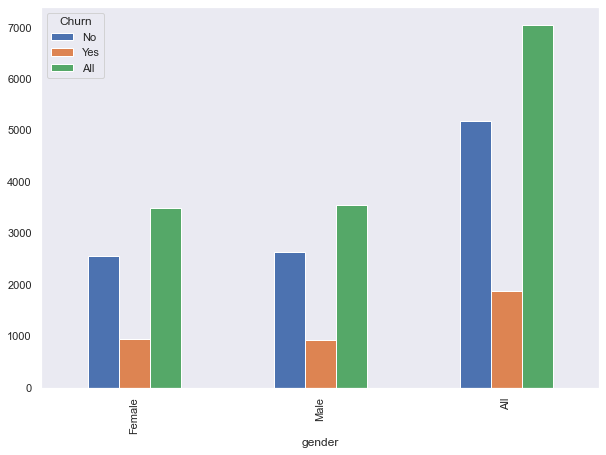

In [36]:
print(pd.crosstab(df.gender,df.Churn,margins=True))
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(10,7));

Text(0.5, 1.0, '%  Senior Citizens')

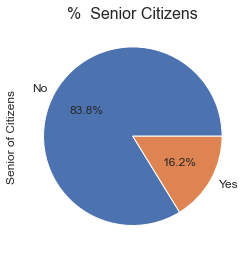

In [41]:
# find age %

ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(4,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior of Citizens',fontsize = 12)
ax.set_title('%  Senior Citizens', fontsize = 16)


#the larger population is the youth and only 16% of senior citizens.

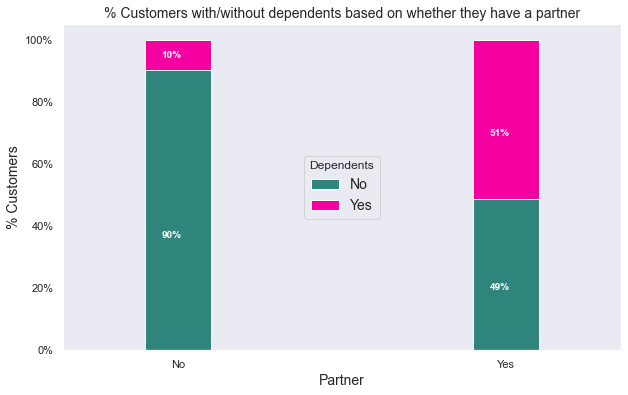

In [52]:
colors = ['#2f847c','#F400a1']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 10)
    

In [ ]:
b)The company should market their service more to the older senior citizen maybe making the product more customer satisfying 
for them to utilize the service.
-the company sould also make their procut more enticing to the people having no dependants and no partners
However the product consumption is almost equal in both males and females.


In [1]:
#2. Services:a. 
#Which 3 services are contributing to a higher monthly charge and resulting tocustomers churning? 
#(Use visualizations in explaining your analysis)

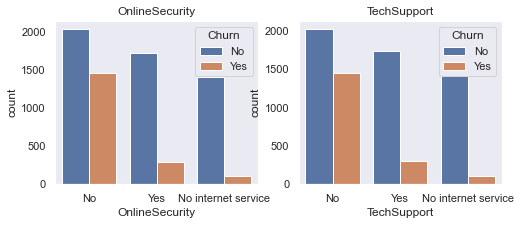

Churn Ratios by Online Security 

No                     41.77
Yes                    14.61
No internet service     7.40
Name: OnlineSecurity, dtype: float64

Churn Ratios by Tech Support 

No                     41.64
Yes                    15.17
No internet service     7.40
Name: TechSupport, dtype: float64


In [17]:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.title("OnlineSecurity")
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = df)
plt.subplot(122)
plt.title("TechSupport")
sns.countplot(x = 'TechSupport', hue = 'Churn', data = df)
plt.show()

print('Churn Ratios by Online Security','\n')
print(round(df[df['Churn']=='Yes']['OnlineSecurity'].value_counts() / df['OnlineSecurity'].value_counts()*100,2))

print('\nChurn Ratios by Tech Support','\n')
print(round(df[df['Churn']=='Yes']['TechSupport'].value_counts() / df['TechSupport'].value_counts()*100,2))


In [14]:
#most of the customers who didnt sign up for online security and tech support were the most churned.

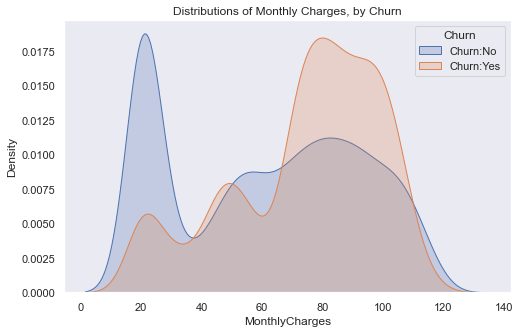

Average Monthly Fee of Churned Customers: 74 
Average Monthly Fee of Not-Churned Customers: 61


In [6]:
churn_mcharge=df[df.Churn=='Yes']['MonthlyCharges']
not_churn_mcharge=df[df.Churn=='No']['MonthlyCharges']
plt.figure(figsize=(8,5))

sns.kdeplot(data=not_churn_mcharge,shade=True)
sns.kdeplot(data=churn_mcharge,shade=True)
plt.legend(("Churn:No", "Churn:Yes"),title='Churn')
plt.title("Distributions of Monthly Charges, by Churn")
plt.show()

print('Average Monthly Fee of Churned Customers:',round(churn_mcharge.mean()),
      '\nAverage Monthly Fee of Not-Churned Customers:',round(not_churn_mcharge.mean()))

In [ ]:
#the higher the monthly charges the higher the churn rate.Telco services should therefore be made affordable.